In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [5]:
insurance_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_female        1338 non-null   uint8  
 5   sex_male          1338 non-null   uint8  
 6   smoker_no         1338 non-null   uint8  
 7   smoker_yes        1338 non-null   uint8  
 8   region_northeast  1338 non-null   uint8  
 9   region_northwest  1338 non-null   uint8  
 10  region_southeast  1338 non-null   uint8  
 11  region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(2), uint8(8)
memory usage: 52.4 KB


In [6]:
#create x and y values
X = insurance_one_hot.drop("charges", axis=1)
Y = insurance_one_hot['charges']

In [7]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [8]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [9]:
#create training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [10]:
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [11]:
#build a neural network
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(11,)),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

model.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics='mae')

model.fit(X_train, Y_train, epochs=500)

Epoch 1/500
34/34 [==============================] - 0s 986us/step - loss: 12903.9883 - mae: 12903.9883
Epoch 2/500
34/34 [==============================] - 0s 1ms/step - loss: 10408.2383 - mae: 10408.2383
Epoch 3/500
34/34 [==============================] - 0s 939us/step - loss: 7647.1001 - mae: 7647.1001
Epoch 4/500
34/34 [==============================] - 0s 1000us/step - loss: 7430.8516 - mae: 7430.8516
Epoch 5/500
34/34 [==============================] - 0s 1ms/step - loss: 7354.2261 - mae: 7354.2261
Epoch 6/500
34/34 [==============================] - 0s 1ms/step - loss: 7288.5044 - mae: 7288.5044
Epoch 7/500
34/34 [==============================] - 0s 991us/step - loss: 7201.9502 - mae: 7201.9502
Epoch 8/500
34/34 [==============================] - 0s 1ms/step - loss: 7123.2861 - mae: 7123.2861
Epoch 9/500
34/34 [==============================] - 0s 986us/step - loss: 7038.7544 - mae: 7038.7544
Epoch 10/500
34/34 [==============================] - 0s 932us/step - loss: 6949.7773

34/34 [==============================] - 0s 848us/step - loss: 3707.3179 - mae: 3707.3179
Epoch 81/500
34/34 [==============================] - 0s 1000us/step - loss: 3684.2947 - mae: 3684.2947
Epoch 82/500
34/34 [==============================] - 0s 970us/step - loss: 3693.8850 - mae: 3693.8850
Epoch 83/500
34/34 [==============================] - 0s 975us/step - loss: 3685.6484 - mae: 3685.6484
Epoch 84/500
34/34 [==============================] - 0s 1ms/step - loss: 3709.9795 - mae: 3709.9795
Epoch 85/500
34/34 [==============================] - 0s 1ms/step - loss: 3676.6677 - mae: 3676.6677
Epoch 86/500
34/34 [==============================] - 0s 945us/step - loss: 3676.2764 - mae: 3676.2764
Epoch 87/500
34/34 [==============================] - 0s 995us/step - loss: 3675.0664 - mae: 3675.0664
Epoch 88/500
34/34 [==============================] - 0s 982us/step - loss: 3667.1729 - mae: 3667.1729
Epoch 89/500
34/34 [==============================] - 0s 1ms/step - loss: 3675.2708 - mae

34/34 [==============================] - 0s 969us/step - loss: 3494.2883 - mae: 3494.2883
Epoch 160/500
34/34 [==============================] - 0s 1ms/step - loss: 3527.4634 - mae: 3527.4634
Epoch 161/500
34/34 [==============================] - 0s 931us/step - loss: 3499.5334 - mae: 3499.5334
Epoch 162/500
34/34 [==============================] - 0s 1ms/step - loss: 3491.2839 - mae: 3491.2839
Epoch 163/500
34/34 [==============================] - 0s 1ms/step - loss: 3495.1858 - mae: 3495.1858
Epoch 164/500
34/34 [==============================] - 0s 977us/step - loss: 3512.7825 - mae: 3512.7825
Epoch 165/500
34/34 [==============================] - 0s 972us/step - loss: 3524.8943 - mae: 3524.8943
Epoch 166/500
34/34 [==============================] - 0s 1ms/step - loss: 3482.1550 - mae: 3482.1550
Epoch 167/500
34/34 [==============================] - 0s 1ms/step - loss: 3503.5728 - mae: 3503.5728
Epoch 168/500
34/34 [==============================] - 0s 939us/step - loss: 3490.0808 -

34/34 [==============================] - 0s 932us/step - loss: 3505.6313 - mae: 3505.6313
Epoch 239/500
34/34 [==============================] - 0s 1ms/step - loss: 3495.6768 - mae: 3495.6768
Epoch 240/500
34/34 [==============================] - 0s 953us/step - loss: 3499.5500 - mae: 3499.5500
Epoch 241/500
34/34 [==============================] - 0s 994us/step - loss: 3489.4148 - mae: 3489.4148
Epoch 242/500
34/34 [==============================] - 0s 1ms/step - loss: 3492.8735 - mae: 3492.8735
Epoch 243/500
34/34 [==============================] - 0s 1ms/step - loss: 3488.3977 - mae: 3488.3977
Epoch 244/500
34/34 [==============================] - 0s 950us/step - loss: 3500.1665 - mae: 3500.1665
Epoch 245/500
34/34 [==============================] - 0s 971us/step - loss: 3511.7600 - mae: 3511.7600
Epoch 246/500
34/34 [==============================] - 0s 1ms/step - loss: 3478.3953 - mae: 3478.3953
Epoch 247/500
34/34 [==============================] - 0s 1ms/step - loss: 3486.9919 -

34/34 [==============================] - 0s 1ms/step - loss: 3481.3198 - mae: 3481.3198
Epoch 318/500
34/34 [==============================] - 0s 989us/step - loss: 3488.9219 - mae: 3488.9219
Epoch 319/500
34/34 [==============================] - 0s 1ms/step - loss: 3485.9705 - mae: 3485.9705
Epoch 320/500
34/34 [==============================] - 0s 1ms/step - loss: 3483.8284 - mae: 3483.8284
Epoch 321/500
34/34 [==============================] - 0s 946us/step - loss: 3483.7432 - mae: 3483.7432
Epoch 322/500
34/34 [==============================] - 0s 1ms/step - loss: 3492.5596 - mae: 3492.5596
Epoch 323/500
34/34 [==============================] - 0s 926us/step - loss: 3484.3062 - mae: 3484.3062
Epoch 324/500
34/34 [==============================] - 0s 992us/step - loss: 3499.9456 - mae: 3499.9456
Epoch 325/500
34/34 [==============================] - 0s 993us/step - loss: 3482.2976 - mae: 3482.2976
Epoch 326/500
34/34 [==============================] - 0s 938us/step - loss: 3503.4763

34/34 [==============================] - 0s 909us/step - loss: 3526.4172 - mae: 3526.4172
Epoch 397/500
34/34 [==============================] - 0s 1ms/step - loss: 3508.5671 - mae: 3508.5671
Epoch 398/500
34/34 [==============================] - 0s 970us/step - loss: 3503.6646 - mae: 3503.6646
Epoch 399/500
34/34 [==============================] - 0s 909us/step - loss: 3479.9529 - mae: 3479.9529
Epoch 400/500
34/34 [==============================] - 0s 879us/step - loss: 3477.6975 - mae: 3477.6975
Epoch 401/500
34/34 [==============================] - 0s 879us/step - loss: 3483.3416 - mae: 3483.3416
Epoch 402/500
34/34 [==============================] - 0s 879us/step - loss: 3481.3137 - mae: 3481.3137
Epoch 403/500
34/34 [==============================] - 0s 939us/step - loss: 3488.0835 - mae: 3488.0835
Epoch 404/500
34/34 [==============================] - 0s 879us/step - loss: 3530.1487 - mae: 3530.1487
Epoch 405/500
34/34 [==============================] - 0s 909us/step - loss: 348

34/34 [==============================] - 0s 909us/step - loss: 3490.1721 - mae: 3490.1721
Epoch 476/500
34/34 [==============================] - 0s 939us/step - loss: 3503.4177 - mae: 3503.4177
Epoch 477/500
34/34 [==============================] - 0s 970us/step - loss: 3495.8193 - mae: 3495.8193
Epoch 478/500
34/34 [==============================] - 0s 970us/step - loss: 3488.3608 - mae: 3488.3608
Epoch 479/500
34/34 [==============================] - 0s 939us/step - loss: 3475.5913 - mae: 3475.5913
Epoch 480/500
34/34 [==============================] - 0s 970us/step - loss: 3488.9556 - mae: 3488.9556
Epoch 481/500
34/34 [==============================] - 0s 1000us/step - loss: 3479.1365 - mae: 3479.1365
Epoch 482/500
34/34 [==============================] - 0s 970us/step - loss: 3490.8354 - mae: 3490.8354
Epoch 483/500
34/34 [==============================] - 0s 970us/step - loss: 3485.2246 - mae: 3485.2246
Epoch 484/500
34/34 [==============================] - 0s 942us/step - loss: 

In [12]:
model.evaluate(X_test, Y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3157.3853 - mae: 3157.3853


[3157.38525390625, 3157.38525390625]

In [18]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(11,)),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_1.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics='mae')

history = model_1.fit(X_train, Y_train, epochs=1500)

Epoch 1/1500
34/34 [==============================] - 0s 1ms/step - loss: 12853.5947 - mae: 12853.5947
Epoch 2/1500
34/34 [==============================] - 0s 1ms/step - loss: 8433.7344 - mae: 8433.7344
Epoch 3/1500
34/34 [==============================] - 0s 1ms/step - loss: 7439.9399 - mae: 7439.9399
Epoch 4/1500
34/34 [==============================] - 0s 1ms/step - loss: 7268.3066 - mae: 7268.3066
Epoch 5/1500
34/34 [==============================] - 0s 1000us/step - loss: 7137.9673 - mae: 7137.9673
Epoch 6/1500
34/34 [==============================] - 0s 1ms/step - loss: 6984.8540 - mae: 6984.8540
Epoch 7/1500
34/34 [==============================] - 0s 1ms/step - loss: 6807.5557 - mae: 6807.5557
Epoch 8/1500
34/34 [==============================] - 0s 1ms/step - loss: 6598.8569 - mae: 6598.8569
Epoch 9/1500
34/34 [==============================] - 0s 1ms/step - loss: 6444.5815 - mae: 6444.5815
Epoch 10/1500
34/34 [==============================] - 0s 1ms/step - loss: 6350.4590 -

34/34 [==============================] - 0s 1ms/step - loss: 2400.8152 - mae: 2400.8152
Epoch 82/1500
34/34 [==============================] - 0s 1ms/step - loss: 2290.9641 - mae: 2290.9641
Epoch 83/1500
34/34 [==============================] - 0s 1ms/step - loss: 2311.1782 - mae: 2311.1782
Epoch 84/1500
34/34 [==============================] - 0s 1ms/step - loss: 2280.1021 - mae: 2280.1021
Epoch 85/1500
34/34 [==============================] - 0s 1ms/step - loss: 2288.5005 - mae: 2288.5005
Epoch 86/1500
34/34 [==============================] - 0s 1ms/step - loss: 2230.0129 - mae: 2230.0129
Epoch 87/1500
34/34 [==============================] - 0s 1ms/step - loss: 2307.3979 - mae: 2307.3979
Epoch 88/1500
34/34 [==============================] - 0s 1ms/step - loss: 2243.3408 - mae: 2243.3408
Epoch 89/1500
34/34 [==============================] - 0s 1ms/step - loss: 2219.9119 - mae: 2219.9119
Epoch 90/1500
34/34 [==============================] - 0s 963us/step - loss: 2225.9927 - mae: 22

34/34 [==============================] - 0s 1ms/step - loss: 2056.0347 - mae: 2056.0347
Epoch 161/1500
34/34 [==============================] - 0s 1ms/step - loss: 1987.0519 - mae: 1987.0519
Epoch 162/1500
34/34 [==============================] - 0s 977us/step - loss: 2022.2124 - mae: 2022.2124
Epoch 163/1500
34/34 [==============================] - 0s 1ms/step - loss: 1985.9005 - mae: 1985.9005
Epoch 164/1500
34/34 [==============================] - 0s 1ms/step - loss: 1993.5133 - mae: 1993.5133
Epoch 165/1500
34/34 [==============================] - 0s 988us/step - loss: 1980.6077 - mae: 1980.6077
Epoch 166/1500
34/34 [==============================] - 0s 1ms/step - loss: 2008.7416 - mae: 2008.7416
Epoch 167/1500
34/34 [==============================] - 0s 1ms/step - loss: 2023.2280 - mae: 2023.2280
Epoch 168/1500
34/34 [==============================] - 0s 1ms/step - loss: 1976.3274 - mae: 1976.3274
Epoch 169/1500
34/34 [==============================] - 0s 1ms/step - loss: 1993.757

34/34 [==============================] - 0s 1ms/step - loss: 1924.8470 - mae: 1924.8470
Epoch 240/1500
34/34 [==============================] - 0s 1ms/step - loss: 1884.6750 - mae: 1884.6750
Epoch 241/1500
34/34 [==============================] - 0s 1ms/step - loss: 1919.6765 - mae: 1919.6765
Epoch 242/1500
34/34 [==============================] - 0s 971us/step - loss: 1895.8174 - mae: 1895.8174
Epoch 243/1500
34/34 [==============================] - 0s 1ms/step - loss: 1911.2078 - mae: 1911.2078
Epoch 244/1500
34/34 [==============================] - 0s 1ms/step - loss: 1900.6820 - mae: 1900.6820
Epoch 245/1500
34/34 [==============================] - 0s 1ms/step - loss: 1911.1012 - mae: 1911.1012
Epoch 246/1500
34/34 [==============================] - 0s 1ms/step - loss: 1925.9991 - mae: 1925.9991
Epoch 247/1500
34/34 [==============================] - 0s 1ms/step - loss: 1912.5175 - mae: 1912.5175
Epoch 248/1500
34/34 [==============================] - 0s 1ms/step - loss: 1886.7625 

34/34 [==============================] - 0s 1ms/step - loss: 1799.9028 - mae: 1799.9028
Epoch 319/1500
34/34 [==============================] - 0s 1ms/step - loss: 1845.5896 - mae: 1845.5896
Epoch 320/1500
34/34 [==============================] - 0s 1ms/step - loss: 1799.5477 - mae: 1799.5477
Epoch 321/1500
34/34 [==============================] - 0s 1ms/step - loss: 1817.3566 - mae: 1817.3566
Epoch 322/1500
34/34 [==============================] - 0s 1ms/step - loss: 1826.2239 - mae: 1826.2239
Epoch 323/1500
34/34 [==============================] - 0s 1ms/step - loss: 1876.7349 - mae: 1876.7349
Epoch 324/1500
34/34 [==============================] - 0s 987us/step - loss: 1836.0959 - mae: 1836.0959
Epoch 325/1500
34/34 [==============================] - 0s 1ms/step - loss: 1791.0254 - mae: 1791.0254
Epoch 326/1500
34/34 [==============================] - 0s 1ms/step - loss: 1778.2762 - mae: 1778.2762
Epoch 327/1500
34/34 [==============================] - 0s 1ms/step - loss: 1804.1208 

34/34 [==============================] - 0s 1ms/step - loss: 1660.4855 - mae: 1660.4855
Epoch 398/1500
34/34 [==============================] - 0s 1ms/step - loss: 1654.3690 - mae: 1654.3690
Epoch 399/1500
34/34 [==============================] - 0s 1ms/step - loss: 1684.6375 - mae: 1684.6375
Epoch 400/1500
34/34 [==============================] - 0s 1ms/step - loss: 1661.6129 - mae: 1661.6129
Epoch 401/1500
34/34 [==============================] - 0s 1ms/step - loss: 1695.4773 - mae: 1695.4773
Epoch 402/1500
34/34 [==============================] - 0s 1ms/step - loss: 1668.3033 - mae: 1668.3033
Epoch 403/1500
34/34 [==============================] - 0s 1ms/step - loss: 1637.3342 - mae: 1637.3342
Epoch 404/1500
34/34 [==============================] - 0s 1ms/step - loss: 1659.7325 - mae: 1659.7325
Epoch 405/1500
34/34 [==============================] - 0s 1ms/step - loss: 1690.0198 - mae: 1690.0198
Epoch 406/1500
34/34 [==============================] - 0s 1ms/step - loss: 1682.0664 - 

34/34 [==============================] - 0s 1ms/step - loss: 1567.8573 - mae: 1567.8573
Epoch 477/1500
34/34 [==============================] - 0s 1ms/step - loss: 1561.8138 - mae: 1561.8138
Epoch 478/1500
34/34 [==============================] - 0s 986us/step - loss: 1588.6447 - mae: 1588.6447
Epoch 479/1500
34/34 [==============================] - 0s 1ms/step - loss: 1635.8214 - mae: 1635.8214
Epoch 480/1500
34/34 [==============================] - 0s 1ms/step - loss: 1584.9513 - mae: 1584.9513
Epoch 481/1500
34/34 [==============================] - 0s 1ms/step - loss: 1586.6589 - mae: 1586.6589
Epoch 482/1500
34/34 [==============================] - 0s 1ms/step - loss: 1599.2188 - mae: 1599.2188
Epoch 483/1500
34/34 [==============================] - 0s 1ms/step - loss: 1574.7164 - mae: 1574.7164
Epoch 484/1500
34/34 [==============================] - 0s 1ms/step - loss: 1601.0796 - mae: 1601.0796
Epoch 485/1500
34/34 [==============================] - 0s 1ms/step - loss: 1584.4272 

34/34 [==============================] - 0s 1ms/step - loss: 1531.7704 - mae: 1531.7704
Epoch 556/1500
34/34 [==============================] - 0s 940us/step - loss: 1523.3312 - mae: 1523.3312
Epoch 557/1500
34/34 [==============================] - 0s 1ms/step - loss: 1563.2694 - mae: 1563.2694
Epoch 558/1500
34/34 [==============================] - 0s 1ms/step - loss: 1513.1544 - mae: 1513.1544
Epoch 559/1500
34/34 [==============================] - 0s 1ms/step - loss: 1525.3590 - mae: 1525.3590
Epoch 560/1500
34/34 [==============================] - 0s 1ms/step - loss: 1639.0831 - mae: 1639.0831
Epoch 561/1500
34/34 [==============================] - 0s 1ms/step - loss: 1692.2559 - mae: 1692.2559
Epoch 562/1500
34/34 [==============================] - 0s 1ms/step - loss: 1552.6941 - mae: 1552.6941
Epoch 563/1500
34/34 [==============================] - 0s 1ms/step - loss: 1548.0947 - mae: 1548.0947
Epoch 564/1500
34/34 [==============================] - 0s 1ms/step - loss: 1526.1990 

34/34 [==============================] - 0s 1ms/step - loss: 1547.6046 - mae: 1547.6046
Epoch 635/1500
34/34 [==============================] - 0s 1ms/step - loss: 1558.8573 - mae: 1558.8573
Epoch 636/1500
34/34 [==============================] - 0s 1ms/step - loss: 1557.4296 - mae: 1557.4296
Epoch 637/1500
34/34 [==============================] - 0s 1ms/step - loss: 1588.1621 - mae: 1588.1621
Epoch 638/1500
34/34 [==============================] - 0s 1ms/step - loss: 1545.7374 - mae: 1545.7374
Epoch 639/1500
34/34 [==============================] - 0s 1ms/step - loss: 1512.7523 - mae: 1512.7523
Epoch 640/1500
34/34 [==============================] - 0s 1ms/step - loss: 1511.6947 - mae: 1511.6947
Epoch 641/1500
34/34 [==============================] - 0s 1ms/step - loss: 1505.2584 - mae: 1505.2584
Epoch 642/1500
34/34 [==============================] - 0s 1ms/step - loss: 1489.7524 - mae: 1489.7524
Epoch 643/1500
34/34 [==============================] - 0s 1ms/step - loss: 1680.6912 - 

34/34 [==============================] - 0s 1ms/step - loss: 1512.5967 - mae: 1512.5967
Epoch 714/1500
34/34 [==============================] - 0s 1ms/step - loss: 1493.2963 - mae: 1493.2963
Epoch 715/1500
34/34 [==============================] - 0s 1ms/step - loss: 1529.9175 - mae: 1529.9175
Epoch 716/1500
34/34 [==============================] - 0s 1ms/step - loss: 1557.4529 - mae: 1557.4529
Epoch 717/1500
34/34 [==============================] - 0s 1ms/step - loss: 1489.7899 - mae: 1489.7899
Epoch 718/1500
34/34 [==============================] - 0s 1ms/step - loss: 1570.8229 - mae: 1570.8229
Epoch 719/1500
34/34 [==============================] - 0s 1ms/step - loss: 1543.9839 - mae: 1543.9839
Epoch 720/1500
34/34 [==============================] - 0s 1ms/step - loss: 1475.9657 - mae: 1475.9657
Epoch 721/1500
34/34 [==============================] - 0s 1ms/step - loss: 1493.4899 - mae: 1493.4899
Epoch 722/1500
34/34 [==============================] - 0s 1ms/step - loss: 1485.0850 - 

Epoch 792/1500
34/34 [==============================] - 0s 970us/step - loss: 1516.9136 - mae: 1516.9136
Epoch 793/1500
34/34 [==============================] - 0s 1000us/step - loss: 1482.0863 - mae: 1482.0863
Epoch 794/1500
34/34 [==============================] - 0s 1ms/step - loss: 1485.5421 - mae: 1485.5421
Epoch 795/1500
34/34 [==============================] - 0s 1ms/step - loss: 1533.5132 - mae: 1533.5132
Epoch 796/1500
34/34 [==============================] - 0s 1000us/step - loss: 1495.2986 - mae: 1495.2986
Epoch 797/1500
34/34 [==============================] - 0s 1ms/step - loss: 1464.5892 - mae: 1464.5892
Epoch 798/1500
34/34 [==============================] - 0s 986us/step - loss: 1455.3379 - mae: 1455.3379
Epoch 799/1500
34/34 [==============================] - 0s 988us/step - loss: 1462.4930 - mae: 1462.4930
Epoch 800/1500
34/34 [==============================] - 0s 1ms/step - loss: 1487.8865 - mae: 1487.8865
Epoch 801/1500
34/34 [==============================] - 0s 97

34/34 [==============================] - 0s 1000us/step - loss: 1445.6228 - mae: 1445.6228
Epoch 871/1500
34/34 [==============================] - 0s 994us/step - loss: 1483.0231 - mae: 1483.0231
Epoch 872/1500
34/34 [==============================] - 0s 994us/step - loss: 1445.4744 - mae: 1445.4744
Epoch 873/1500
34/34 [==============================] - 0s 1ms/step - loss: 1452.3629 - mae: 1452.3629
Epoch 874/1500
34/34 [==============================] - 0s 1ms/step - loss: 1434.2423 - mae: 1434.2423
Epoch 875/1500
34/34 [==============================] - 0s 1ms/step - loss: 1454.0878 - mae: 1454.0878
Epoch 876/1500
34/34 [==============================] - 0s 1ms/step - loss: 1516.1886 - mae: 1516.1886
Epoch 877/1500
34/34 [==============================] - 0s 1ms/step - loss: 1515.4733 - mae: 1515.4733
Epoch 878/1500
34/34 [==============================] - 0s 1ms/step - loss: 1501.2921 - mae: 1501.2921
Epoch 879/1500
34/34 [==============================] - 0s 1ms/step - loss: 1500.

34/34 [==============================] - 0s 1ms/step - loss: 1467.1183 - mae: 1467.1183
Epoch 950/1500
34/34 [==============================] - 0s 1ms/step - loss: 1483.3501 - mae: 1483.3501
Epoch 951/1500
34/34 [==============================] - 0s 1ms/step - loss: 1462.1324 - mae: 1462.1324
Epoch 952/1500
34/34 [==============================] - 0s 1ms/step - loss: 1461.3341 - mae: 1461.3341
Epoch 953/1500
34/34 [==============================] - 0s 1ms/step - loss: 1454.4255 - mae: 1454.4255
Epoch 954/1500
34/34 [==============================] - 0s 1ms/step - loss: 1459.3792 - mae: 1459.3792
Epoch 955/1500
34/34 [==============================] - 0s 1ms/step - loss: 1461.6802 - mae: 1461.6802
Epoch 956/1500
34/34 [==============================] - 0s 1ms/step - loss: 1467.5160 - mae: 1467.5160
Epoch 957/1500
34/34 [==============================] - 0s 1ms/step - loss: 1477.8628 - mae: 1477.8628
Epoch 958/1500
34/34 [==============================] - 0s 995us/step - loss: 1491.1416 

34/34 [==============================] - 0s 1ms/step - loss: 1517.3226 - mae: 1517.3226
Epoch 1029/1500
34/34 [==============================] - 0s 1ms/step - loss: 1524.1406 - mae: 1524.1406
Epoch 1030/1500
34/34 [==============================] - 0s 1ms/step - loss: 1480.0239 - mae: 1480.0239
Epoch 1031/1500
34/34 [==============================] - 0s 1ms/step - loss: 1459.6976 - mae: 1459.6976
Epoch 1032/1500
34/34 [==============================] - 0s 1ms/step - loss: 1498.3273 - mae: 1498.3273
Epoch 1033/1500
34/34 [==============================] - 0s 1ms/step - loss: 1554.6693 - mae: 1554.6693
Epoch 1034/1500
34/34 [==============================] - 0s 1ms/step - loss: 1543.7466 - mae: 1543.7466
Epoch 1035/1500
34/34 [==============================] - 0s 1ms/step - loss: 1464.6411 - mae: 1464.6411
Epoch 1036/1500
34/34 [==============================] - 0s 1ms/step - loss: 1497.9497 - mae: 1497.9497
Epoch 1037/1500
34/34 [==============================] - 0s 1ms/step - loss: 147

34/34 [==============================] - 0s 1ms/step - loss: 1453.2356 - mae: 1453.2356
Epoch 1107/1500
34/34 [==============================] - 0s 1ms/step - loss: 1442.6544 - mae: 1442.6544
Epoch 1108/1500
34/34 [==============================] - 0s 1ms/step - loss: 1485.1755 - mae: 1485.1755
Epoch 1109/1500
34/34 [==============================] - 0s 1ms/step - loss: 1491.3597 - mae: 1491.3597
Epoch 1110/1500
34/34 [==============================] - 0s 1ms/step - loss: 1456.3549 - mae: 1456.3549
Epoch 1111/1500
34/34 [==============================] - 0s 1ms/step - loss: 1439.5771 - mae: 1439.5771
Epoch 1112/1500
34/34 [==============================] - 0s 978us/step - loss: 1482.2430 - mae: 1482.2430
Epoch 1113/1500
34/34 [==============================] - 0s 1ms/step - loss: 1472.8856 - mae: 1472.8856
Epoch 1114/1500
34/34 [==============================] - 0s 1ms/step - loss: 1540.3446 - mae: 1540.3446
Epoch 1115/1500
34/34 [==============================] - 0s 1ms/step - loss: 1

34/34 [==============================] - 0s 1ms/step - loss: 1456.3328 - mae: 1456.3328
Epoch 1185/1500
34/34 [==============================] - 0s 1ms/step - loss: 1497.3229 - mae: 1497.3229
Epoch 1186/1500
34/34 [==============================] - 0s 1ms/step - loss: 1442.5571 - mae: 1442.5571
Epoch 1187/1500
34/34 [==============================] - 0s 1ms/step - loss: 1445.6045 - mae: 1445.6045
Epoch 1188/1500
34/34 [==============================] - 0s 1ms/step - loss: 1436.6283 - mae: 1436.6283
Epoch 1189/1500
34/34 [==============================] - 0s 1ms/step - loss: 1467.2335 - mae: 1467.2335
Epoch 1190/1500
34/34 [==============================] - 0s 1ms/step - loss: 1448.0568 - mae: 1448.0568
Epoch 1191/1500
34/34 [==============================] - 0s 1ms/step - loss: 1465.2330 - mae: 1465.2330
Epoch 1192/1500
34/34 [==============================] - 0s 1ms/step - loss: 1451.4036 - mae: 1451.4036
Epoch 1193/1500
34/34 [==============================] - 0s 1ms/step - loss: 145

34/34 [==============================] - 0s 1ms/step - loss: 1514.5094 - mae: 1514.5094
Epoch 1263/1500
34/34 [==============================] - 0s 1ms/step - loss: 1503.6824 - mae: 1503.6824
Epoch 1264/1500
34/34 [==============================] - 0s 1ms/step - loss: 1428.0964 - mae: 1428.0964
Epoch 1265/1500
34/34 [==============================] - 0s 1ms/step - loss: 1491.5608 - mae: 1491.5608
Epoch 1266/1500
34/34 [==============================] - 0s 1ms/step - loss: 1445.9006 - mae: 1445.9006
Epoch 1267/1500
34/34 [==============================] - 0s 1ms/step - loss: 1425.9948 - mae: 1425.9948
Epoch 1268/1500
34/34 [==============================] - 0s 1ms/step - loss: 1437.7351 - mae: 1437.7351
Epoch 1269/1500
34/34 [==============================] - 0s 1ms/step - loss: 1423.8107 - mae: 1423.8107
Epoch 1270/1500
34/34 [==============================] - 0s 1ms/step - loss: 1470.7975 - mae: 1470.7975
Epoch 1271/1500
34/34 [==============================] - 0s 1ms/step - loss: 143

34/34 [==============================] - 0s 1ms/step - loss: 1497.8981 - mae: 1497.8981
Epoch 1341/1500
34/34 [==============================] - 0s 1ms/step - loss: 1492.8480 - mae: 1492.8480
Epoch 1342/1500
34/34 [==============================] - 0s 1ms/step - loss: 1485.7701 - mae: 1485.7701
Epoch 1343/1500
34/34 [==============================] - 0s 1ms/step - loss: 1476.0206 - mae: 1476.0206
Epoch 1344/1500
34/34 [==============================] - 0s 1ms/step - loss: 1526.4606 - mae: 1526.4606
Epoch 1345/1500
34/34 [==============================] - 0s 1ms/step - loss: 1528.4689 - mae: 1528.4689
Epoch 1346/1500
34/34 [==============================] - 0s 1ms/step - loss: 1453.9270 - mae: 1453.9270
Epoch 1347/1500
34/34 [==============================] - 0s 1ms/step - loss: 1446.5464 - mae: 1446.5464
Epoch 1348/1500
34/34 [==============================] - 0s 1ms/step - loss: 1457.1227 - mae: 1457.1227
Epoch 1349/1500
34/34 [==============================] - 0s 1ms/step - loss: 146

34/34 [==============================] - 0s 1ms/step - loss: 1487.5470 - mae: 1487.5470
Epoch 1419/1500
34/34 [==============================] - 0s 1ms/step - loss: 1480.0697 - mae: 1480.0697
Epoch 1420/1500
34/34 [==============================] - 0s 1ms/step - loss: 1509.4706 - mae: 1509.4706
Epoch 1421/1500
34/34 [==============================] - 0s 1ms/step - loss: 1546.3645 - mae: 1546.3645
Epoch 1422/1500
34/34 [==============================] - 0s 1ms/step - loss: 1576.0197 - mae: 1576.0197
Epoch 1423/1500
34/34 [==============================] - 0s 1ms/step - loss: 1519.3209 - mae: 1519.3209
Epoch 1424/1500
34/34 [==============================] - 0s 1ms/step - loss: 1483.2078 - mae: 1483.2078
Epoch 1425/1500
34/34 [==============================] - 0s 1ms/step - loss: 1562.1943 - mae: 1562.1943
Epoch 1426/1500
34/34 [==============================] - 0s 1ms/step - loss: 1494.4342 - mae: 1494.4342
Epoch 1427/1500
34/34 [==============================] - 0s 1ms/step - loss: 149

34/34 [==============================] - 0s 1ms/step - loss: 1434.2133 - mae: 1434.2133
Epoch 1497/1500
34/34 [==============================] - 0s 1000us/step - loss: 1466.8604 - mae: 1466.8604
Epoch 1498/1500
34/34 [==============================] - 0s 1000us/step - loss: 1578.4596 - mae: 1578.4596
Epoch 1499/1500
34/34 [==============================] - 0s 939us/step - loss: 1506.2042 - mae: 1506.2042
Epoch 1500/1500
34/34 [==============================] - 0s 939us/step - loss: 1486.6058 - mae: 1486.6058


In [19]:
model_1.evaluate(X_test, Y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1255.2410 - mae: 1255.2410


[1255.240966796875, 1255.240966796875]

In [20]:
insurance['charges'].mean(), insurance['charges'].median()

(13270.422265141257, 9382.033)

Text(0.5, 0, 'epochs')

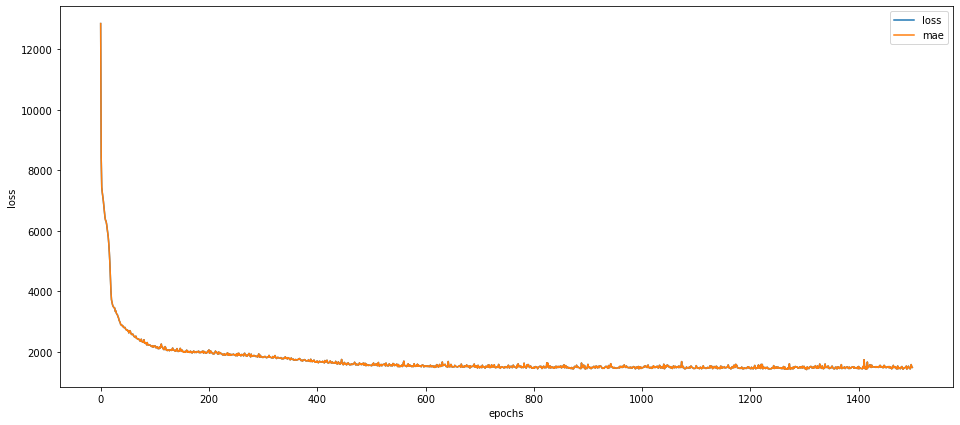

In [27]:
pd.DataFrame(history.history).plot(figsize=(16,7))
plt.ylabel("loss")
plt.xlabel("epochs")

<AxesSubplot:>

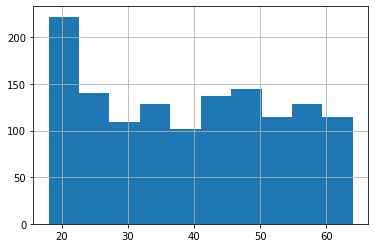

In [30]:
#normalization
insurance['age'].hist()

<AxesSubplot:>

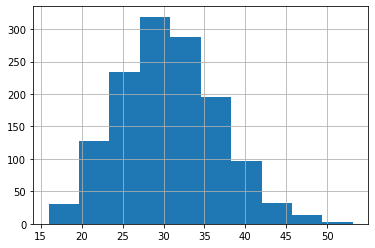

In [31]:
insurance['bmi'].hist()

In [32]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [36]:
#preparing data with Scikit-learn
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

ct = make_column_transformer((MinMaxScaler(), ["age","bmi","children"]),
                             (OneHotEncoder(handle_unknown="ignore"), ["sex","smoker","region"]))

X = insurance.drop("charges", axis=1)
Y = insurance["charges"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#fit the column transformer to our training data
ct.fit(X_train)

#transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [40]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [41]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [42]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [279]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(11,)),
    tf.keras.layers.Dense(20, activation='relu'), 
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(learning_rate=0.05), metrics='mae')

history = model.fit(X_train_normal, Y_train, epochs=1500)

Epoch 1/1500
34/34 [==============================] - 0s 1ms/step - loss: 10768.3535 - mae: 10768.3535
Epoch 2/1500
34/34 [==============================] - 0s 1ms/step - loss: 6361.7451 - mae: 6361.7451
Epoch 3/1500
34/34 [==============================] - 0s 982us/step - loss: 3685.9563 - mae: 3685.9563
Epoch 4/1500
34/34 [==============================] - 0s 1ms/step - loss: 3490.2468 - mae: 3490.2468
Epoch 5/1500
34/34 [==============================] - 0s 1ms/step - loss: 3438.4756 - mae: 3438.4756
Epoch 6/1500
34/34 [==============================] - 0s 1ms/step - loss: 3356.3965 - mae: 3356.3965
Epoch 7/1500
34/34 [==============================] - 0s 1ms/step - loss: 3266.4482 - mae: 3266.4482
Epoch 8/1500
34/34 [==============================] - 0s 1ms/step - loss: 3225.7573 - mae: 3225.7573
Epoch 9/1500
34/34 [==============================] - 0s 1ms/step - loss: 3127.1006 - mae: 3127.1006
Epoch 10/1500
34/34 [==============================] - 0s 1ms/step - loss: 3017.1213 - 

34/34 [==============================] - 0s 1ms/step - loss: 2142.5894 - mae: 2142.5894
Epoch 82/1500
34/34 [==============================] - 0s 1000us/step - loss: 2138.6533 - mae: 2138.6533
Epoch 83/1500
34/34 [==============================] - 0s 1ms/step - loss: 2144.1450 - mae: 2144.1450
Epoch 84/1500
34/34 [==============================] - 0s 1ms/step - loss: 2089.2549 - mae: 2089.2549
Epoch 85/1500
34/34 [==============================] - 0s 998us/step - loss: 2156.3271 - mae: 2156.3271
Epoch 86/1500
34/34 [==============================] - 0s 1ms/step - loss: 2149.2698 - mae: 2149.2698
Epoch 87/1500
34/34 [==============================] - 0s 1ms/step - loss: 2077.1624 - mae: 2077.1624
Epoch 88/1500
34/34 [==============================] - 0s 1ms/step - loss: 2081.5125 - mae: 2081.5125
Epoch 89/1500
34/34 [==============================] - 0s 1ms/step - loss: 2084.2351 - mae: 2084.2351
Epoch 90/1500
34/34 [==============================] - 0s 2ms/step - loss: 2107.3933 - mae:

34/34 [==============================] - 0s 2ms/step - loss: 2122.5173 - mae: 2122.5173
Epoch 161/1500
34/34 [==============================] - 0s 1ms/step - loss: 2059.9297 - mae: 2059.9297
Epoch 162/1500
34/34 [==============================] - 0s 1ms/step - loss: 2084.1792 - mae: 2084.1792
Epoch 163/1500
34/34 [==============================] - 0s 1ms/step - loss: 2051.0078 - mae: 2051.0078
Epoch 164/1500
34/34 [==============================] - 0s 1ms/step - loss: 2040.7863 - mae: 2040.7863
Epoch 165/1500
34/34 [==============================] - 0s 1ms/step - loss: 2046.6373 - mae: 2046.6373
Epoch 166/1500
34/34 [==============================] - 0s 1ms/step - loss: 2048.3147 - mae: 2048.3147
Epoch 167/1500
34/34 [==============================] - 0s 1ms/step - loss: 2044.8737 - mae: 2044.8737
Epoch 168/1500
34/34 [==============================] - 0s 1ms/step - loss: 2049.5242 - mae: 2049.5242
Epoch 169/1500
34/34 [==============================] - 0s 1ms/step - loss: 2099.6611 - 

34/34 [==============================] - 0s 1ms/step - loss: 2175.2866 - mae: 2175.2866
Epoch 240/1500
34/34 [==============================] - 0s 1ms/step - loss: 2074.0476 - mae: 2074.0476
Epoch 241/1500
34/34 [==============================] - 0s 971us/step - loss: 2093.5503 - mae: 2093.5503
Epoch 242/1500
34/34 [==============================] - 0s 1ms/step - loss: 2098.2290 - mae: 2098.2290
Epoch 243/1500
34/34 [==============================] - 0s 1ms/step - loss: 2064.0796 - mae: 2064.0796
Epoch 244/1500
34/34 [==============================] - 0s 1ms/step - loss: 2210.4995 - mae: 2210.4995
Epoch 245/1500
34/34 [==============================] - 0s 1000us/step - loss: 2190.4768 - mae: 2190.4768
Epoch 246/1500
34/34 [==============================] - 0s 1ms/step - loss: 2063.5508 - mae: 2063.5508
Epoch 247/1500
34/34 [==============================] - 0s 1000us/step - loss: 2061.2947 - mae: 2061.2947
Epoch 248/1500
34/34 [==============================] - 0s 1ms/step - loss: 2048

34/34 [==============================] - 0s 1ms/step - loss: 2100.9666 - mae: 2100.9666
Epoch 319/1500
34/34 [==============================] - 0s 1ms/step - loss: 2073.7671 - mae: 2073.7671
Epoch 320/1500
34/34 [==============================] - 0s 1000us/step - loss: 2068.4490 - mae: 2068.4490
Epoch 321/1500
34/34 [==============================] - 0s 1ms/step - loss: 2043.7947 - mae: 2043.7947
Epoch 322/1500
34/34 [==============================] - 0s 1ms/step - loss: 2031.7346 - mae: 2031.7346
Epoch 323/1500
34/34 [==============================] - 0s 1ms/step - loss: 2136.0300 - mae: 2136.0300
Epoch 324/1500
34/34 [==============================] - 0s 1ms/step - loss: 2107.8950 - mae: 2107.8950
Epoch 325/1500
34/34 [==============================] - 0s 1ms/step - loss: 2069.9531 - mae: 2069.9531
Epoch 326/1500
34/34 [==============================] - 0s 940us/step - loss: 2054.7097 - mae: 2054.7097
Epoch 327/1500
34/34 [==============================] - 0s 960us/step - loss: 2043.

34/34 [==============================] - 0s 1ms/step - loss: 2134.3335 - mae: 2134.3335
Epoch 398/1500
34/34 [==============================] - 0s 1ms/step - loss: 2031.8773 - mae: 2031.8773
Epoch 399/1500
34/34 [==============================] - 0s 1000us/step - loss: 1992.1344 - mae: 1992.1344
Epoch 400/1500
34/34 [==============================] - 0s 1ms/step - loss: 2014.6633 - mae: 2014.6633
Epoch 401/1500
34/34 [==============================] - 0s 1ms/step - loss: 2053.3291 - mae: 2053.3291
Epoch 402/1500
34/34 [==============================] - 0s 1000us/step - loss: 2011.0475 - mae: 2011.0475
Epoch 403/1500
34/34 [==============================] - 0s 1000us/step - loss: 2000.9596 - mae: 2000.9596
Epoch 404/1500
34/34 [==============================] - 0s 975us/step - loss: 2009.1790 - mae: 2009.1790
Epoch 405/1500
34/34 [==============================] - 0s 999us/step - loss: 2066.2046 - mae: 2066.2046
Epoch 406/1500
34/34 [==============================] - 0s 1ms/step - loss:

34/34 [==============================] - 0s 1ms/step - loss: 2030.7617 - mae: 2030.7617
Epoch 477/1500
34/34 [==============================] - 0s 1ms/step - loss: 2017.0297 - mae: 2017.0297
Epoch 478/1500
34/34 [==============================] - 0s 1ms/step - loss: 2063.4226 - mae: 2063.4226
Epoch 479/1500
34/34 [==============================] - 0s 1ms/step - loss: 2046.3658 - mae: 2046.3658
Epoch 480/1500
34/34 [==============================] - 0s 1ms/step - loss: 2011.5991 - mae: 2011.5991
Epoch 481/1500
34/34 [==============================] - 0s 1ms/step - loss: 2040.2764 - mae: 2040.2764
Epoch 482/1500
34/34 [==============================] - 0s 1ms/step - loss: 2075.2622 - mae: 2075.2622
Epoch 483/1500
34/34 [==============================] - 0s 1ms/step - loss: 2016.3262 - mae: 2016.3262
Epoch 484/1500
34/34 [==============================] - 0s 1ms/step - loss: 2016.4070 - mae: 2016.4070
Epoch 485/1500
34/34 [==============================] - 0s 1ms/step - loss: 2029.6687 - 

34/34 [==============================] - 0s 1ms/step - loss: 1650.3457 - mae: 1650.3457
Epoch 556/1500
34/34 [==============================] - 0s 1ms/step - loss: 1668.8240 - mae: 1668.8240
Epoch 557/1500
34/34 [==============================] - 0s 1ms/step - loss: 1667.0725 - mae: 1667.0725
Epoch 558/1500
34/34 [==============================] - 0s 1ms/step - loss: 1596.5616 - mae: 1596.5616
Epoch 559/1500
34/34 [==============================] - 0s 1ms/step - loss: 1636.5277 - mae: 1636.5277
Epoch 560/1500
34/34 [==============================] - 0s 1ms/step - loss: 1570.7874 - mae: 1570.7874
Epoch 561/1500
34/34 [==============================] - 0s 1ms/step - loss: 1781.4352 - mae: 1781.4352
Epoch 562/1500
34/34 [==============================] - 0s 1000us/step - loss: 1630.0095 - mae: 1630.0095
Epoch 563/1500
34/34 [==============================] - 0s 1ms/step - loss: 1639.7933 - mae: 1639.7933
Epoch 564/1500
34/34 [==============================] - 0s 1ms/step - loss: 1659.5283

34/34 [==============================] - 0s 1ms/step - loss: 1555.4886 - mae: 1555.4886
Epoch 635/1500
34/34 [==============================] - 0s 1ms/step - loss: 1601.7726 - mae: 1601.7726
Epoch 636/1500
34/34 [==============================] - 0s 1ms/step - loss: 1567.1469 - mae: 1567.1469
Epoch 637/1500
34/34 [==============================] - 0s 1ms/step - loss: 1601.7505 - mae: 1601.7505
Epoch 638/1500
34/34 [==============================] - 0s 1ms/step - loss: 1693.6665 - mae: 1693.6665
Epoch 639/1500
34/34 [==============================] - 0s 1ms/step - loss: 1581.2367 - mae: 1581.2367
Epoch 640/1500
34/34 [==============================] - 0s 1ms/step - loss: 1525.6292 - mae: 1525.6292
Epoch 641/1500
34/34 [==============================] - 0s 1ms/step - loss: 1619.1635 - mae: 1619.1635
Epoch 642/1500
34/34 [==============================] - 0s 1ms/step - loss: 1528.2882 - mae: 1528.2882
Epoch 643/1500
34/34 [==============================] - 0s 1ms/step - loss: 1665.0085 - 

34/34 [==============================] - 0s 1ms/step - loss: 1578.6670 - mae: 1578.6670
Epoch 714/1500
34/34 [==============================] - 0s 1ms/step - loss: 1544.1794 - mae: 1544.1794
Epoch 715/1500
34/34 [==============================] - 0s 1ms/step - loss: 1552.6210 - mae: 1552.6210
Epoch 716/1500
34/34 [==============================] - 0s 1ms/step - loss: 1550.8855 - mae: 1550.8855
Epoch 717/1500
34/34 [==============================] - 0s 1ms/step - loss: 1509.3387 - mae: 1509.3387
Epoch 718/1500
34/34 [==============================] - 0s 1ms/step - loss: 1555.4036 - mae: 1555.4036
Epoch 719/1500
34/34 [==============================] - 0s 1ms/step - loss: 1556.6685 - mae: 1556.6685
Epoch 720/1500
34/34 [==============================] - 0s 1ms/step - loss: 1542.7616 - mae: 1542.7616
Epoch 721/1500
34/34 [==============================] - 0s 1ms/step - loss: 1540.4458 - mae: 1540.4458
Epoch 722/1500
34/34 [==============================] - 0s 1ms/step - loss: 1627.9072 - 

34/34 [==============================] - 0s 1ms/step - loss: 1578.1044 - mae: 1578.1044
Epoch 793/1500
34/34 [==============================] - 0s 1ms/step - loss: 1566.1616 - mae: 1566.1616
Epoch 794/1500
34/34 [==============================] - 0s 1ms/step - loss: 1496.1210 - mae: 1496.1210
Epoch 795/1500
34/34 [==============================] - 0s 1ms/step - loss: 1518.4193 - mae: 1518.4193
Epoch 796/1500
34/34 [==============================] - 0s 1ms/step - loss: 1564.2019 - mae: 1564.2019
Epoch 797/1500
34/34 [==============================] - 0s 1ms/step - loss: 1525.1309 - mae: 1525.1309
Epoch 798/1500
34/34 [==============================] - 0s 1ms/step - loss: 1606.9669 - mae: 1606.9669
Epoch 799/1500
34/34 [==============================] - 0s 1ms/step - loss: 1613.9415 - mae: 1613.9415
Epoch 800/1500
34/34 [==============================] - 0s 1ms/step - loss: 1587.7809 - mae: 1587.7809
Epoch 801/1500
34/34 [==============================] - 0s 1ms/step - loss: 1651.5284 - 

34/34 [==============================] - 0s 1ms/step - loss: 1525.1121 - mae: 1525.1121
Epoch 872/1500
34/34 [==============================] - 0s 1ms/step - loss: 1471.6973 - mae: 1471.6973
Epoch 873/1500
34/34 [==============================] - 0s 990us/step - loss: 1491.4071 - mae: 1491.4071
Epoch 874/1500
34/34 [==============================] - 0s 1ms/step - loss: 1534.1313 - mae: 1534.1313
Epoch 875/1500
34/34 [==============================] - 0s 1ms/step - loss: 1482.5577 - mae: 1482.5577
Epoch 876/1500
34/34 [==============================] - 0s 1ms/step - loss: 1515.1562 - mae: 1515.1562
Epoch 877/1500
34/34 [==============================] - 0s 1ms/step - loss: 1595.6953 - mae: 1595.6953
Epoch 878/1500
34/34 [==============================] - 0s 1ms/step - loss: 1498.0504 - mae: 1498.0504
Epoch 879/1500
34/34 [==============================] - 0s 1ms/step - loss: 1531.2585 - mae: 1531.2585
Epoch 880/1500
34/34 [==============================] - 0s 1ms/step - loss: 1532.7859 

34/34 [==============================] - 0s 2ms/step - loss: 1515.0065 - mae: 1515.0065
Epoch 951/1500
34/34 [==============================] - 0s 2ms/step - loss: 1508.7848 - mae: 1508.7848
Epoch 952/1500
34/34 [==============================] - 0s 2ms/step - loss: 1520.5669 - mae: 1520.5669
Epoch 953/1500
34/34 [==============================] - 0s 1ms/step - loss: 1511.4470 - mae: 1511.4470
Epoch 954/1500
34/34 [==============================] - 0s 2ms/step - loss: 1520.5184 - mae: 1520.5184
Epoch 955/1500
34/34 [==============================] - 0s 1ms/step - loss: 1531.1912 - mae: 1531.1912
Epoch 956/1500
34/34 [==============================] - 0s 1ms/step - loss: 1471.3406 - mae: 1471.3406
Epoch 957/1500
34/34 [==============================] - 0s 1000us/step - loss: 1483.5151 - mae: 1483.5151
Epoch 958/1500
34/34 [==============================] - 0s 970us/step - loss: 1525.7941 - mae: 1525.7941
Epoch 959/1500
34/34 [==============================] - 0s 1ms/step - loss: 1489.90

34/34 [==============================] - 0s 1ms/step - loss: 1597.0505 - mae: 1597.0505
Epoch 1030/1500
34/34 [==============================] - 0s 1ms/step - loss: 1491.3097 - mae: 1491.3097
Epoch 1031/1500
34/34 [==============================] - 0s 1000us/step - loss: 1510.8931 - mae: 1510.8931
Epoch 1032/1500
34/34 [==============================] - 0s 1ms/step - loss: 1527.2296 - mae: 1527.2296
Epoch 1033/1500
34/34 [==============================] - 0s 1ms/step - loss: 1648.3773 - mae: 1648.3773
Epoch 1034/1500
34/34 [==============================] - 0s 1ms/step - loss: 1496.7947 - mae: 1496.7947
Epoch 1035/1500
34/34 [==============================] - 0s 1ms/step - loss: 1527.8029 - mae: 1527.8029
Epoch 1036/1500
34/34 [==============================] - 0s 1ms/step - loss: 1466.5859 - mae: 1466.5859
Epoch 1037/1500
34/34 [==============================] - 0s 1ms/step - loss: 1469.7198 - mae: 1469.7198
Epoch 1038/1500
34/34 [==============================] - 0s 1ms/step - loss: 

34/34 [==============================] - 0s 1000us/step - loss: 1617.4932 - mae: 1617.4932
Epoch 1108/1500
34/34 [==============================] - 0s 1ms/step - loss: 1488.5183 - mae: 1488.5183
Epoch 1109/1500
34/34 [==============================] - 0s 1ms/step - loss: 1556.5397 - mae: 1556.5397
Epoch 1110/1500
34/34 [==============================] - 0s 1ms/step - loss: 1497.7445 - mae: 1497.7445
Epoch 1111/1500
34/34 [==============================] - 0s 970us/step - loss: 1503.6343 - mae: 1503.6343
Epoch 1112/1500
34/34 [==============================] - 0s 1ms/step - loss: 1528.0227 - mae: 1528.0227
Epoch 1113/1500
34/34 [==============================] - 0s 1ms/step - loss: 1491.5471 - mae: 1491.5471
Epoch 1114/1500
34/34 [==============================] - 0s 1ms/step - loss: 1551.3494 - mae: 1551.3494
Epoch 1115/1500
34/34 [==============================] - 0s 1ms/step - loss: 1479.8884 - mae: 1479.8884
Epoch 1116/1500
34/34 [==============================] - 0s 1ms/step - loss

34/34 [==============================] - 0s 1ms/step - loss: 1505.0612 - mae: 1505.0612
Epoch 1186/1500
34/34 [==============================] - 0s 1ms/step - loss: 1533.8097 - mae: 1533.8097
Epoch 1187/1500
34/34 [==============================] - 0s 1ms/step - loss: 1461.3340 - mae: 1461.3340
Epoch 1188/1500
34/34 [==============================] - 0s 1ms/step - loss: 1475.3817 - mae: 1475.3817
Epoch 1189/1500
34/34 [==============================] - 0s 1ms/step - loss: 1469.3977 - mae: 1469.3977
Epoch 1190/1500
34/34 [==============================] - 0s 1ms/step - loss: 1453.8495 - mae: 1453.8495
Epoch 1191/1500
34/34 [==============================] - 0s 1ms/step - loss: 1543.0658 - mae: 1543.0658
Epoch 1192/1500
34/34 [==============================] - 0s 1000us/step - loss: 1521.0890 - mae: 1521.0890
Epoch 1193/1500
34/34 [==============================] - 0s 1ms/step - loss: 1542.2802 - mae: 1542.2802
Epoch 1194/1500
34/34 [==============================] - 0s 1ms/step - loss: 

34/34 [==============================] - 0s 1ms/step - loss: 1571.8590 - mae: 1571.8590
Epoch 1264/1500
34/34 [==============================] - 0s 1ms/step - loss: 1529.7256 - mae: 1529.7256
Epoch 1265/1500
34/34 [==============================] - 0s 1000us/step - loss: 1477.6420 - mae: 1477.6420
Epoch 1266/1500
34/34 [==============================] - 0s 1ms/step - loss: 1458.3082 - mae: 1458.3082
Epoch 1267/1500
34/34 [==============================] - 0s 1ms/step - loss: 1500.7316 - mae: 1500.7316
Epoch 1268/1500
34/34 [==============================] - 0s 1ms/step - loss: 1460.4384 - mae: 1460.4384
Epoch 1269/1500
34/34 [==============================] - 0s 1ms/step - loss: 1498.5072 - mae: 1498.5072
Epoch 1270/1500
34/34 [==============================] - 0s 1ms/step - loss: 1501.5762 - mae: 1501.5762
Epoch 1271/1500
34/34 [==============================] - 0s 1ms/step - loss: 1453.9443 - mae: 1453.9443
Epoch 1272/1500
34/34 [==============================] - 0s 1000us/step - los

34/34 [==============================] - 0s 1000us/step - loss: 1471.4756 - mae: 1471.4756
Epoch 1342/1500
34/34 [==============================] - 0s 1ms/step - loss: 1584.1722 - mae: 1584.1722
Epoch 1343/1500
34/34 [==============================] - 0s 1ms/step - loss: 1517.4387 - mae: 1517.4387
Epoch 1344/1500
34/34 [==============================] - 0s 1ms/step - loss: 1578.8407 - mae: 1578.8407
Epoch 1345/1500
34/34 [==============================] - 0s 1ms/step - loss: 1488.9086 - mae: 1488.9086
Epoch 1346/1500
34/34 [==============================] - 0s 1ms/step - loss: 1514.3221 - mae: 1514.3221
Epoch 1347/1500
34/34 [==============================] - 0s 1000us/step - loss: 1466.8159 - mae: 1466.8159
Epoch 1348/1500
34/34 [==============================] - 0s 1ms/step - loss: 1468.5109 - mae: 1468.5109
Epoch 1349/1500
34/34 [==============================] - 0s 1ms/step - loss: 1466.6249 - mae: 1466.6249
Epoch 1350/1500
34/34 [==============================] - 0s 1ms/step - los

34/34 [==============================] - 0s 1ms/step - loss: 1459.7550 - mae: 1459.7550
Epoch 1420/1500
34/34 [==============================] - 0s 1ms/step - loss: 1440.1718 - mae: 1440.1718
Epoch 1421/1500
34/34 [==============================] - 0s 1ms/step - loss: 1521.7976 - mae: 1521.7976
Epoch 1422/1500
34/34 [==============================] - 0s 1ms/step - loss: 1466.2295 - mae: 1466.2295
Epoch 1423/1500
34/34 [==============================] - 0s 1ms/step - loss: 1454.5627 - mae: 1454.5627
Epoch 1424/1500
34/34 [==============================] - 0s 1ms/step - loss: 1500.4771 - mae: 1500.4771
Epoch 1425/1500
34/34 [==============================] - 0s 1ms/step - loss: 1491.9585 - mae: 1491.9585
Epoch 1426/1500
34/34 [==============================] - 0s 1ms/step - loss: 1527.2378 - mae: 1527.2378
Epoch 1427/1500
34/34 [==============================] - 0s 1ms/step - loss: 1444.9965 - mae: 1444.9965
Epoch 1428/1500
34/34 [==============================] - 0s 1ms/step - loss: 155

34/34 [==============================] - 0s 1ms/step - loss: 1453.1478 - mae: 1453.1478
Epoch 1498/1500
34/34 [==============================] - 0s 1ms/step - loss: 1499.0366 - mae: 1499.0366
Epoch 1499/1500
34/34 [==============================] - 0s 1ms/step - loss: 1588.5466 - mae: 1588.5466
Epoch 1500/1500
34/34 [==============================] - 0s 1ms/step - loss: 1485.8267 - mae: 1485.8267


In [280]:
model.evaluate(X_test_normal, Y_test)

9/9 [==============================] - 0s 1ms/step - loss: 1324.6996 - mae: 1324.6996


[1324.6995849609375, 1324.6995849609375]

<AxesSubplot:>

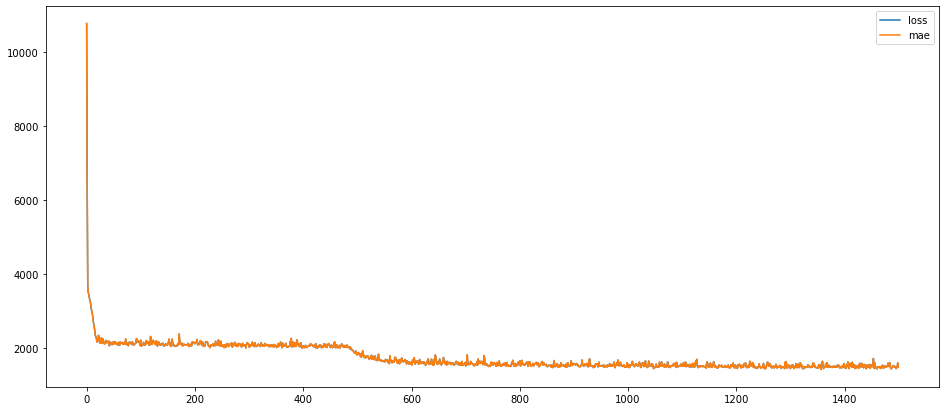

In [281]:
pd.DataFrame(history.history).plot(figsize=(16,7))

In [272]:
predictions = model.predict(X_test_normal)
predictions = predictions.squeeze()
predictions, len(predictions)

9/9 [==============================] - 0s 901us/step


(array([ 8929.491 ,  5261.16  , 28746.594 ,  9165.395 , 33909.7   ,
         4545.619 ,  2136.308 , 13972.542 ,  3662.5225, 10102.183 ,
        17965.016 ,  7108.8296,  3851.1594, 46614.516 , 48931.51  ,
        44439.203 ,  9616.173 , 43250.83  ,  8073.3853, 21899.814 ,
         5074.52  ,  7283.2554,  1260.2041,  2783.2478, 10909.793 ,
        10755.973 , 12459.079 ,  5121.626 ,  9552.864 ,  1145.7512,
         8108.8267, 11614.402 ,  2052.213 ,  5562.749 ,  2914.8875,
         7301.0854,  2641.8845,  7191.0093, 23777.547 , 38927.156 ,
         4663.3374,  2693.1177, 11469.335 , 11928.036 ,  4811.318 ,
        12137.729 ,  3625.8008,  4413.9673, 42329.414 ,  4346.497 ,
        13661.477 ,  1661.9766,  6809.3257,  1643.4456, 10362.909 ,
        10026.964 ,  3488.43  , 39123.047 , 11645.222 , 10412.192 ,
        13671.517 ,  4610.5723, 14091.49  ,  7836.4966, 10063.945 ,
         4104.7104, 17513.604 , 10685.676 ,  3638.0732,  1737.5085,
         5982.1475,  9254.435 ,  8123.011 ,  621

In [282]:
test = np.array(Y_test[:])

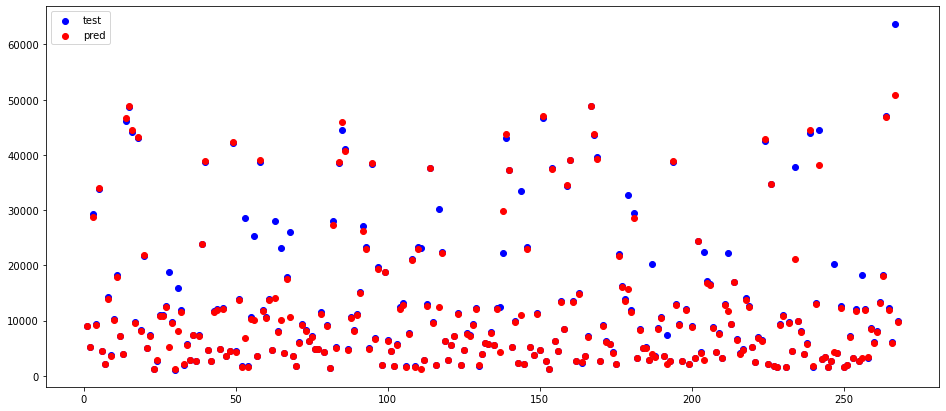

In [283]:
plt.figure(figsize=(16,7))
plt.scatter(np.arange(1,269,1), test, c='blue', label='test')
plt.scatter(np.arange(1,269,1), predictions, c='red', label='pred')
plt.legend()

In [284]:
error_values = abs(test-predictions)
error_values

array([1.65577039e+02, 1.10156437e+01, 5.84389400e+02, 1.36499019e+02,
       1.59407419e+02, 9.36014062e+00, 1.89692555e+01, 2.37993958e+02,
       7.01026391e+01, 1.62259483e+02, 2.94200375e+02, 1.47893510e+02,
       9.62536762e+01, 4.63391125e+02, 2.57952919e+02, 2.36549525e+02,
       1.84715348e+02, 2.80975425e+02, 1.59712246e+02, 1.25492303e+02,
       5.57598047e+00, 1.58245629e+02, 3.90510156e+00, 2.82268527e+01,
       1.75793831e+02, 1.67960544e+02, 1.85509898e+02, 1.36831264e+04,
       1.62976742e+02, 1.42446207e+01, 7.71999507e+03, 2.28221406e+02,
       3.16605906e+01, 1.30681477e+02, 1.07994512e+01, 1.47318501e+02,
       4.41055215e+01, 1.46738723e+02, 1.10115825e+02, 2.17980250e+02,
       2.44595977e+01, 4.98491758e+01, 2.04795039e+02, 1.96956267e+02,
       7.86816289e+01, 1.96099484e+02, 4.59720812e+01, 2.23152852e+01,
       2.04898763e+02, 1.16708030e+02, 2.25727437e+02, 5.74597375e+01,
       2.16674093e+04, 6.54801934e+01, 2.31316520e+02, 1.53063690e+04,
      

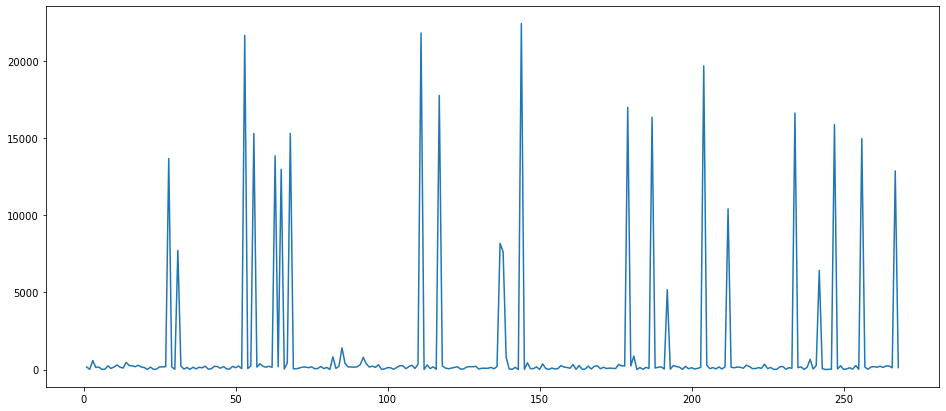

In [285]:
plt.figure(figsize=(16,7))
plt.plot(np.arange(1,269,1), error_values)

In [286]:
mae = model.evaluate(X_test_normal, Y_test)[1]
mae

9/9 [==============================] - 0s 1ms/step - loss: 1324.6996 - mae: 1324.6996


1324.6995849609375

In [287]:
accuracy = []
for i in range(len(test)):
    if abs(test[i]-predictions[i]) <= mae:
        accuracy.append(1)
    else:
        accuracy.append(0)
print(np.mean(accuracy))

0.914179104477612
